Mapeo estándar.


El mapeo está dado por las ecuaciónes:
$$P_{n+1} = P_n + k sin(\theta_{n+1})$$
$$\theta_{n+1} = \theta_n + P_n$$

Donde $P$ representa el momento lineal, y $\theta$ la posición de un bote sujeto a una varilla rígida al que se le patea de manera constamte.


from numpy import cos,sin
from sympy import symbols,Function,solve
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import math
import numpy
%matplotlib inline


Definimos la función *MapEstandar($\theta,p,k$)* que nos dará el mapeo. Se trata de una función que va de $R^2$ a $R^2$. 
Recibe unas condiciones iniciales, $\theta,p,k$  y a partir de ahí calcula el siguiente par ordenado.

También definimos la función *Iterar* que es la que itererá a *MapEstandar*

In [11]:
from numpy import cos,sin
from sympy import symbols,Function,solve
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import math
import numpy
%matplotlib inline

In [2]:
def MapEstandar(theta, p, k): #Definimos el mapeo estandar
    theta_n = (theta + p)%(2*math.pi)
    p_n = (p +k*sin(theta_n))%(2*math.pi)
    return theta_n, p_n

def iterarMap(f,theta_i,p_i,n, k):   #Definimos una función para iterar el mapeo

    x = theta_i                      #    
                                     #Damos condiciones iniciales
    y = p_i                          #

    iteradosMX = [theta_i]

    iteradosMY = [p_i]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i in xrange(n):              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente            

        x,y = f(theta_i,p_i, k)

        iteradosMX.append(x)

        iteradosMY.append(y)
            

        theta_i = x

        p_i = y

    return iteradosMX,iteradosMY   #La funcion iterados regresa las listas que corresponden a la trayectoria del 

Para analizar los puntos fijos del mapeo necesitamos encontrar aquellos puntos para los cuales $P_{n+1}=P_n$ y $\theta_{n+1}=\theta_n$. De las ecuaciones para el mapeo tenemos que:
$$k\sin(\theta_{n+1})=0$$
$$P_{n}=0$$

Por tanto:
$$\theta_{n+1}=0,\pi$$

Lo que nos dice que los puntos fijos son de la forma:
$$x_{1}=(0,0), x_2=(0,\pi)$$

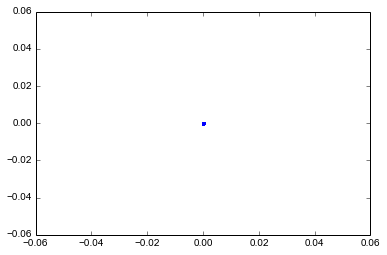

In [3]:
#Graficamente nos quiere decir que la órbita de tales puntos es un solo punto:
k=0.54
n=1000
theta=0
p=0
x,y=iterarMap(MapEstandar, theta,p,n,k)
plt.plot (x,y, '.')


Ahora queremos saber la estabilidad de tales puntos derivamos la función Mapeo:
$$dP_{n+1}=dP_n+k\cos(\theta_n)d\theta_n$$
$$d\theta_{n+1}=d\theta_{n}+dP_n+k\cos(\theta_n)d\theta_n$$

Donde sustituimos la primera ecuación en la segunda para tener todo en términos de las derivadas de $\theta_n$ y de $P_n$ y queremos los vectores y valores propios de la matriz :

$$\begin{pmatrix}
\delta P_{n+1}\\\ 
\delta \theta_{n+1}
\end{pmatrix}= \begin{pmatrix}
1 & k\cos\theta_{n} \\\ 
1 & 1+k\cos\theta_{n}
\end{pmatrix}\cdot \begin{pmatrix}
\delta I_{n}\\\
\delta \theta_{n+1}
\end{pmatrix}$$

In [8]:
x, y, z, k = symbols('x y z k')
f = symbols('f', cls=Function)

In [12]:
f=x**2-x*(2+k*cos(y))+1 #definimos como f el polinomio caracteristico para resolverlo. Donde y=theta

solve(f,x)

AttributeError: cos


La solución para los valores propios:

$$\lambda=\pm\frac{k\cos(\theta_{n}) \pm\sqrt{k(k\cos(\theta_{n} +4))}+2 }{2}$$

Sustituyendo los puntos fijos obetenemos que:

Para $(p,\theta)=(0,\pi)$:
$$\lambda_{\pm}= \frac{2-k\sqrt{k^2 -4k}}{2}$$
 
El punto será  estable si $|R(\lambda)|\lt{2}$  por tanto :

$$\frac{|2-k|}{2}\lt{1}$$  por tanto

$$-4\lt{2-k}\lt{0}$$ 

es decir k $\epsilon[0,4)$

Para $(p,\theta)=(0,0)$:
$$\lambda_{\pm}= \frac{2+k\pm\sqrt{k^2 -4k}}{2}$$
 
luego :
$$\frac{|2+k+\sqrt{k^2-4k}|}{2}\lt{1}$$

$$-2\lt{2+k+\sqrt{k^2-4k}}\lt{2}$$
$$-4-k\lt{\sqrt{k^2-4k}}\lt{-k}$$

Pero para $0\lt{k}$ no se cumple, por lo tanto es un punto inestable.

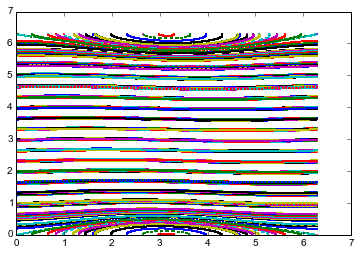

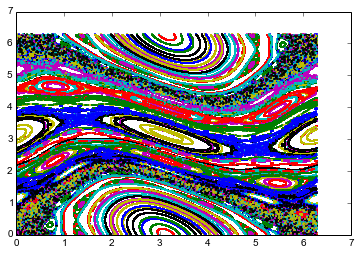

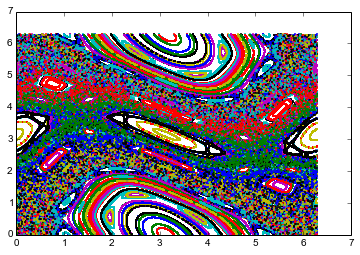

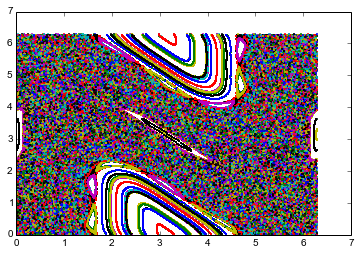

In [13]:
K = [0.06, 0.971635, 1.2, 2]
n = 1000

plt.figure()
for k in K:
    for theta_i in numpy.linspace(0,2*math.pi, 20):
     for p_i in numpy.linspace(0,2*math.pi,20):
            t,p = iterarMap(MapEstandar,theta_i,p_i,n, k)
            plt.plot (t,p,'.', markersize=3)
    plt.show()